# Libraries

In [9]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data exploration

In [2]:
cookies = pd.read_csv('../Data/cookies.csv')

In [4]:
cookies.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,mixins,crunch factor,aesthetic appeal
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,melted,15.2,7,raisins,1.30,3
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,melted,12.4,7,raisins,1.71,3
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,melted,9.4,7,"nuts, chocolate",1.78,3
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,melted,12.2,7,chocolate,1.59,3
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,cubed,19.8,7,"nuts, oats, chocolate",1.30,3


In [6]:
cookies['quality'].value_counts() # #3-11

8     1780
7     1323
9      707
6      617
5      577
10     137
4       44
3        8
11       5
Name: quality, dtype: int64

In [8]:
cookies.isnull().sum()

sugar to flour ratio     0
sugar index              5
bake temp                0
chill time               0
calories                 0
density                  0
pH                       0
grams baking soda        0
bake time               10
quality                  0
butter type              0
weight                   0
diameter                 0
mixins                   2
crunch factor            0
aesthetic appeal         0
dtype: int64

In [15]:
cookies.dropna(inplace=True)

In [16]:
cookies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5181 entries, 0 to 5197
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sugar to flour ratio  5181 non-null   float64
 1   sugar index           5181 non-null   float64
 2   bake temp             5181 non-null   int64  
 3   chill time            5181 non-null   float64
 4   calories              5181 non-null   float64
 5   density               5181 non-null   float64
 6   pH                    5181 non-null   float64
 7   grams baking soda     5181 non-null   float64
 8   bake time             5181 non-null   float64
 9   quality               5181 non-null   int64  
 10  butter type           5181 non-null   object 
 11  weight                5181 non-null   float64
 12  diameter              5181 non-null   int64  
 13  mixins                5181 non-null   object 
 14  crunch factor         5181 non-null   float64
 15  aesthetic appeal     

In [17]:
cookies.describe()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,weight,diameter,crunch factor,aesthetic appeal
count,5181.000000,5181.000000,5181.000000,5181.000000,5181.000000,5181.000000,5181.000000,5181.000000,5181.000000,5181.000000,5181.000000,5181.0,5181.000000,5181.000000
mean,0.318215,5.401718,559.496236,30.383903,115.022679,0.995435,8.221892,0.531002,10.495561,7.325613,14.383922,7.0,1.499025,3.000579
std,0.149769,4.669065,353.265184,17.249170,56.468852,0.055723,0.283618,0.151002,1.194958,1.302336,3.027030,0.0,0.289244,0.024059
min,0.000000,0.600000,90.000000,0.000000,-99.000000,0.987110,7.720000,0.220000,8.000000,3.000000,-99.000000,7.0,1.000000,3.000000
25%,0.240000,1.800000,380.000000,17.000000,76.000000,0.992300,8.110000,0.430000,9.500000,7.000000,12.800000,7.0,1.250000,3.000000
50%,0.310000,3.000000,470.000000,29.000000,118.000000,0.994800,8.210000,0.510000,10.300000,8.000000,14.000000,7.0,1.500000,3.000000
75%,0.390000,8.000000,640.000000,41.000000,155.000000,0.996910,8.320000,0.600000,11.300000,8.000000,15.400000,7.0,1.750000,3.000000
max,3.000000,31.600000,6110.000000,146.500000,366.500000,5.000000,25.000000,2.000000,14.900000,11.000000,31.800000,7.0,2.000000,4.000000


## Get dummies

In [21]:
cookies['butter type'].value_counts() #get dummies (melted 1/ cubes 0)

melted    3908
cubed     1273
Name: butter type, dtype: int64

In [27]:
cookies['butter type'] = cookies['butter type'].replace('melted', 1).replace('cubed', 0)

In [22]:
cookies['mixins'].value_counts() # 2 ways: 1) Others 2) all

chocolate                         1892
raisins                           1196
chocolate, oats                    745
nuts, chocolate                    519
nuts,raisins                       331
nuts, oats, chocolate              293
nuts, oats                         107
chocolate, peanut butter            52
raisins, oats                       24
peanut butter                       15
oats                                 4
chocolate, oats, peanut butter       2
peanut butter, raisins               1
Name: mixins, dtype: int64

In [30]:
mixins_list = ['chocolate', 'raisins', 'oats', 'nuts', 'peanut butter']

In [31]:
for x in mixins_list:
    cookies[x] = 0
    cookies[x] = cookies['mixins'].str.contains(x).astype(int)

In [33]:
cookies.drop('mixins', axis=1, inplace=True)

In [34]:
cookies.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,crunch factor,aesthetic appeal,chocolate,raisins,oats,nuts,peanut butter
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,1,15.2,7,1.30,3,0,1,0,0,0
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,1,12.4,7,1.71,3,0,1,0,0,0
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,1,9.4,7,1.78,3,1,0,0,1,0
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,1,12.2,7,1.59,3,1,0,0,0,0
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,0,19.8,7,1.30,3,1,0,1,1,0


## Correlations

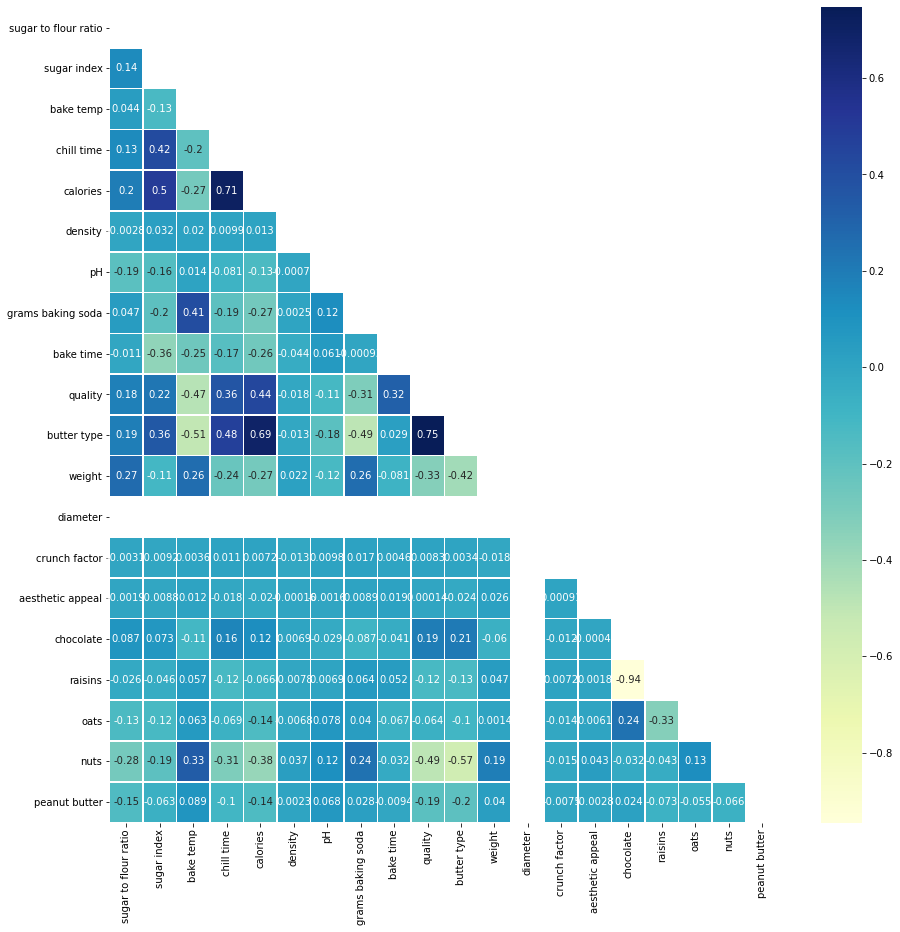

In [36]:
heatmap = cookies.select_dtypes(['int64', 'float64'])

c = cookies.corr()
fig_dims = (15, 15)
mask = np.triu(np.ones_like(c, dtype=bool))
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(c, annot=True,ax = ax, mask=mask,cmap="YlGnBu", linewidths=.5)
plt.show()

In [37]:
X = cookies.drop(columns = 'quality')
y = cookies['quality']

In [38]:
X.corrwith(y)

sugar to flour ratio    0.179929
sugar index             0.219959
bake temp              -0.470895
chill time              0.364925
calories                0.440080
density                -0.017523
pH                     -0.113725
grams baking soda      -0.306251
bake time               0.315445
butter type             0.747288
weight                 -0.328534
diameter                     NaN
crunch factor           0.008346
aesthetic appeal        0.000143
chocolate               0.193648
raisins                -0.123397
oats                   -0.064276
nuts                   -0.491586
peanut butter          -0.187177
dtype: float64

In [ ]:
# drop: density, crunch, aesthetic, diameter

In [ ]:
cookies.drop(columns= 'density', 'crunch factor', 'aesthetic appeal', '', inplace=True)

## Outliers

In [25]:
# find outliers
import scipy.stats as stats
z_scores = stats.zscore(heatmap)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
x = heatmap[filtered_entries]

/Users/sarah/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [26]:
x

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,weight,diameter,crunch factor,aesthetic appeal


# Save datafile

In [35]:
cookies.to_csv('../Data/cookies_clean.csv')